In [24]:
from std_pixel_to_world import std_pixel_to_world
from my_pixel_to_world import my_pixel_to_world
import random
import math
import sunpy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from aiapy.calibrate import register, update_pointing, normalize_exposure

In [2]:
AIA_filename = "../data/AIA/aia_lev1_304a_2011_01_27t22_58_56_12z_image_lev1.fits"
m_aia = sunpy.map.Map(AIA_filename)
m_normalized = normalize_exposure(register(update_pointing(m_aia)))

In [3]:
image_shape_x,image_shape_y=m_normalized.data.shape
approximation_points_num=20
x_pixel_list=np.linspace(0,image_shape_x,approximation_points_num)
y_pixel_list=np.linspace(0,image_shape_y,approximation_points_num)
standard_Tx_list=np.zeros((approximation_points_num**2,1))
standard_Ty_list=np.zeros((approximation_points_num**2,1))

point_list=np.zeros((approximation_points_num**2, 2))

In [4]:
x_pixel_list

array([   0.        ,  215.57894737,  431.15789474,  646.73684211,
        862.31578947, 1077.89473684, 1293.47368421, 1509.05263158,
       1724.63157895, 1940.21052632, 2155.78947368, 2371.36842105,
       2586.94736842, 2802.52631579, 3018.10526316, 3233.68421053,
       3449.26315789, 3664.84210526, 3880.42105263, 4096.        ])

In [9]:
i=0
for x_pixel in x_pixel_list:
    for y_pixel in y_pixel_list:
        point_list[i]=x_pixel,y_pixel
        standard_Tx_list[i],standard_Ty_list[i]=std_pixel_to_world(x_pixel,y_pixel)
        i+=1

In [11]:
x_pixel_list

array([   0.        ,  215.57894737,  431.15789474,  646.73684211,
        862.31578947, 1077.89473684, 1293.47368421, 1509.05263158,
       1724.63157895, 1940.21052632, 2155.78947368, 2371.36842105,
       2586.94736842, 2802.52631579, 3018.10526316, 3233.68421053,
       3449.26315789, 3664.84210526, 3880.42105263, 4096.        ])

In [10]:
standard_Tx_list

array([[-0.00598775],
       [-0.00598631],
       [-0.00598487],
       [-0.00598344],
       [-0.005982  ],
       [-0.00598056],
       [-0.00597912],
       [-0.00597768],
       [-0.00597624],
       [-0.0059748 ],
       [-0.00597336],
       [-0.00597193],
       [-0.00597049],
       [-0.00596905],
       [-0.00596761],
       [-0.00596617],
       [-0.00596473],
       [-0.00596329],
       [-0.00596186],
       [-0.00596042],
       [-0.00536051],
       [-0.00535907],
       [-0.00535763],
       [-0.00535619],
       [-0.00535475],
       [-0.00535331],
       [-0.00535187],
       [-0.00535044],
       [-0.005349  ],
       [-0.00534756],
       [-0.00534612],
       [-0.00534468],
       [-0.00534324],
       [-0.0053418 ],
       [-0.00534037],
       [-0.00533893],
       [-0.00533749],
       [-0.00533605],
       [-0.00533461],
       [-0.00533317],
       [-0.00473326],
       [-0.00473182],
       [-0.00473038],
       [-0.00472894],
       [-0.0047275 ],
       [-0

Text(0.5, 0.92, 'standard_Tx')

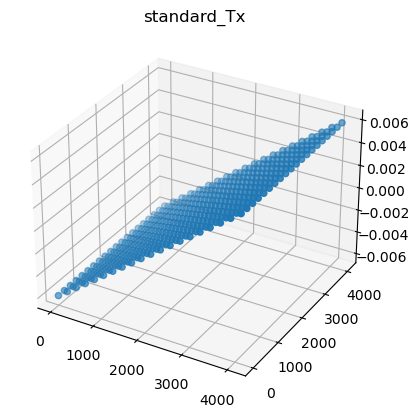

In [22]:
point_x_list=point_list[:,0]
point_y_list=point_list[:,1]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(point_x_list, point_y_list, standard_Tx_list)
ax.set_title("standard_Tx")
# ax.legend()

Text(0.5, 0.92, 'standard_Ty')

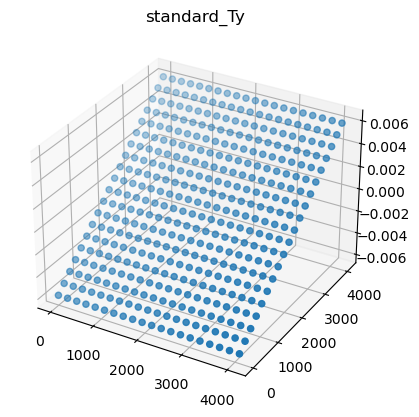

In [23]:
point_x_list=point_list[:,0]
point_y_list=point_list[:,1]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(point_x_list, point_y_list, standard_Ty_list)
ax.set_title("standard_Ty")


## check comparison

max relative error: Tx
3.842501081552374e-05
max relative error: Ty 
0.0012644156500267734


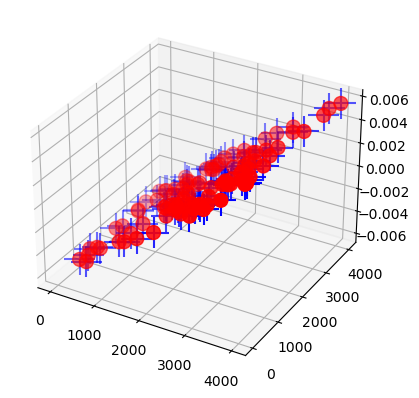

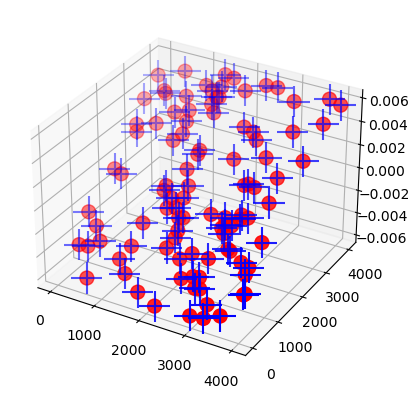

In [35]:
# %%
test_num = 100
std_Tx, std_Ty, my_Tx, my_Ty = np.zeros((test_num,)), np.zeros(
    (test_num,)), np.zeros((test_num,)), np.zeros((test_num,))
pixel_x, pixel_y = np.zeros((test_num,)), np.zeros((test_num,))

for i in range(test_num):
    pixel_x[i] = random.randrange(0, 4096)
    pixel_y[i] = random.randrange(0, 4096)
    std_Tx[i], std_Ty[i] = std_pixel_to_world(pixel_x[i], pixel_y[i])
    my_Tx[i], my_Ty[i] = my_pixel_to_world(pixel_x[i], pixel_y[i])


# %%
fig1 = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter(pixel_x, pixel_y, std_Tx, color="red", marker='o', s=100)
ax1.scatter(pixel_x, pixel_y, my_Tx, color="blue", marker='+', s=500)

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
ax2.scatter(pixel_x, pixel_y, std_Ty, color="red", marker='o', s=100)
ax2.scatter(pixel_x, pixel_y, my_Ty, color="blue", marker='+', s=500)

print("max relative error: Tx")
print(max(abs(1-my_Tx/std_Tx)))
print("max relative error: Ty ")
print(max(abs(1-my_Ty/std_Ty)))